<a href="https://colab.research.google.com/github/AdaK666/Machine-Learning-2024/blob/main/ada_and_ulas_1_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('hello world')

hello world


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

from warnings import filterwarnings
filterwarnings('ignore')

Loading the Dataset

In [ ]:

url = 'https://raw.githubusercontent.com/AdaK666/Machine-Learning-2024/main/Life%20Expectancy%20Data.csv?token=GHSAT0AAAAAACXKXUOEQLA4DEQKK5LVS4ECZXJPQKA'
data = pd.read_csv(url)
data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
data.sample(15) #looking some samples

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
167,Bahamas,2008,Developing,74.5,167.0,0,10.15,0.000000,9.0,0,...,93.0,7.30,93.0,0.1,NaN,NaN,2.5,2.5,0.791,12.6
638,Costa Rica,2002,Developing,78.3,99.0,1,4.17,112.949375,94.0,0,...,94.0,8.23,94.0,0.1,462.149650,46324.0,2.2,2.2,0.712,11.9
1322,Japan,2007,Developed,82.6,67.0,3,7.29,6599.995239,NaN,0,...,97.0,8.25,98.0,0.1,35275.228430,1281.0,1.8,1.5,0.877,15.0
836,Equatorial Guinea,2013,Developing,57.4,327.0,3,10.72,156.390769,NaN,321,...,3.0,3.73,3.0,5.7,2246.993800,183746.0,8.6,8.6,0.586,9.2
634,Costa Rica,2006,Developing,78.0,16.0,1,4.15,1185.412346,88.0,0,...,89.0,7.82,89.0,0.1,5245.187372,438794.0,2.0,1.9,0.727,12.6
1273,Israel,2008,Developing,81.0,65.0,1,2.47,471.553329,99.0,931,...,94.0,7.33,94.0,0.1,29657.442100,7388.0,1.1,1.1,0.877,15.8
2578,Thailand,2006,Developing,73.0,168.0,13,6.18,433.921092,96.0,3588,...,98.0,3.49,98.0,0.5,3368.952576,65824164.0,8.7,8.9,0.686,12.4
2189,Saint Vincent and the Grenadines,2010,Developing,72.5,162.0,0,7.00,0.000000,99.0,0,...,99.0,4.71,99.0,0.1,NaN,NaN,3.5,3.5,0.711,13.3
2919,Zambia,2002,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,...,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
1576,Malawi,2009,Developing,51.5,491.0,36,1.16,7.915071,93.0,21,...,93.0,1.18,93.0,14.9,42.737966,1471462.0,6.9,6.8,0.415,9.9


In [ ]:
data.info() #looking the info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Looking the correlations

In [ ]:
# Select only numerical columns for correlation since there are non numerical columns
numeric_data = data.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()
correlation_matrix

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


<Axes: >

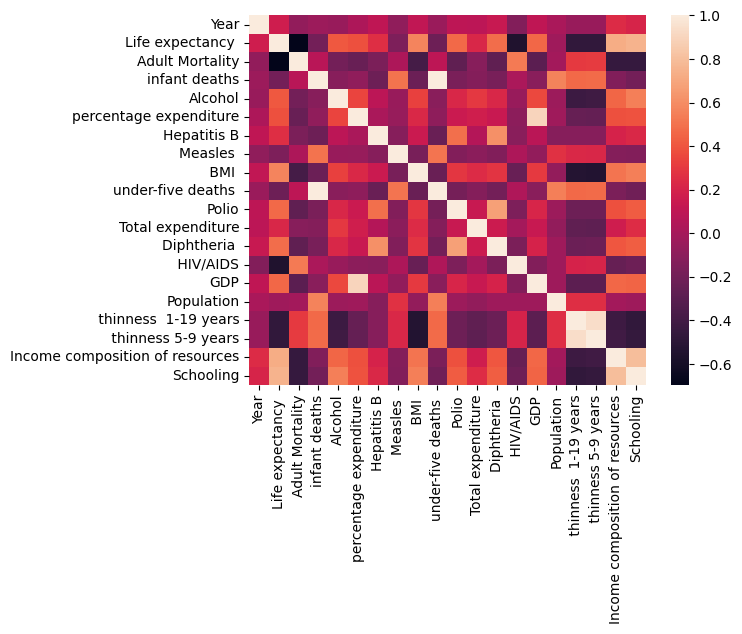

In [ ]:
# plot the heatmap
sns.heatmap(correlation_matrix,
        xticklabels=correlation_matrix.columns,
        yticklabels=correlation_matrix.columns)

In [ ]:
#for making some experiments we made same dataset with different name
data_ulas = pd.read_csv(url)
data_ulas.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
#since there are conuntry names we have decied to turn them into numeric values
print(data_ulas['Country'].unique()) #showing all country names. We need to convert them into a number



['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic of)'

In [ ]:
# Convert country names to numeric values
data_ulas['Country'], country_mapping = pd.factorize(data_ulas['Country'])

print("Country Mapping:")
print(country_mapping)
print("\nData with Country Codes:")
print(data_ulas.head())

Country Mapping:
Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Republic of Tanzania', 'United States of America', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela (Bolivarian Republic of)',
       'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=193)

Data with Country Codes:
   Country  Year      Status  Life expectancy   Adult Mortality  \
0        0  2015  Developing              65.0            263.0   
1        0  2014  Developing              59.9            271.0   
2        0  2013  Developing              59.9            268.0   
3        0  2012  Developing              59.5            272.0   
4        0  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1  

In [ ]:
#also we need to convert 'Developing' and 'Developed' to numbers
print(data_ulas['Status'].unique())

['Developing' 'Developed']


In [ ]:
# Define the mapping
status_mapping = {
    'Developing': 0,
    'Developed': 1  # or any other value for NaN
}

# Apply the mapping
data_ulas['Status'] = data_ulas['Status'].map(status_mapping)
print(data_ulas['Status'].unique())

[0 1]


In [ ]:
#we need to see correlation between inputs but we have many nan values so first we need to handle them!

data_ulas.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   int64  
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int64  
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
data_ulas.columns = data_ulas.columns.str.strip() # if there is some extra space for the columns like 'Life expectancy   '

In [ ]:
#we chosed KNN method which is a simply filling nan values nearest neighbors!
from sklearn.impute import KNNImputer

# Create the KNNImputer object
imputer = KNNImputer(n_neighbors=3)  # It adjustable the number of neighbours as needed

data_ulas_imputed = imputer.fit_transform(data_ulas)

data_ulas_imputed = pd.DataFrame(data_ulas_imputed, columns=data_ulas.columns)

data_ulas_imputed.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.0,2015.0,0.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0.0,2014.0,0.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0.0,2013.0,0.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0.0,2012.0,0.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0.0,2011.0,0.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
data_ulas_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   float64
 1   Year                             2938 non-null   float64
 2   Status                           2938 non-null   float64
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   float64
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   float64
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   float64
 12  Polio               

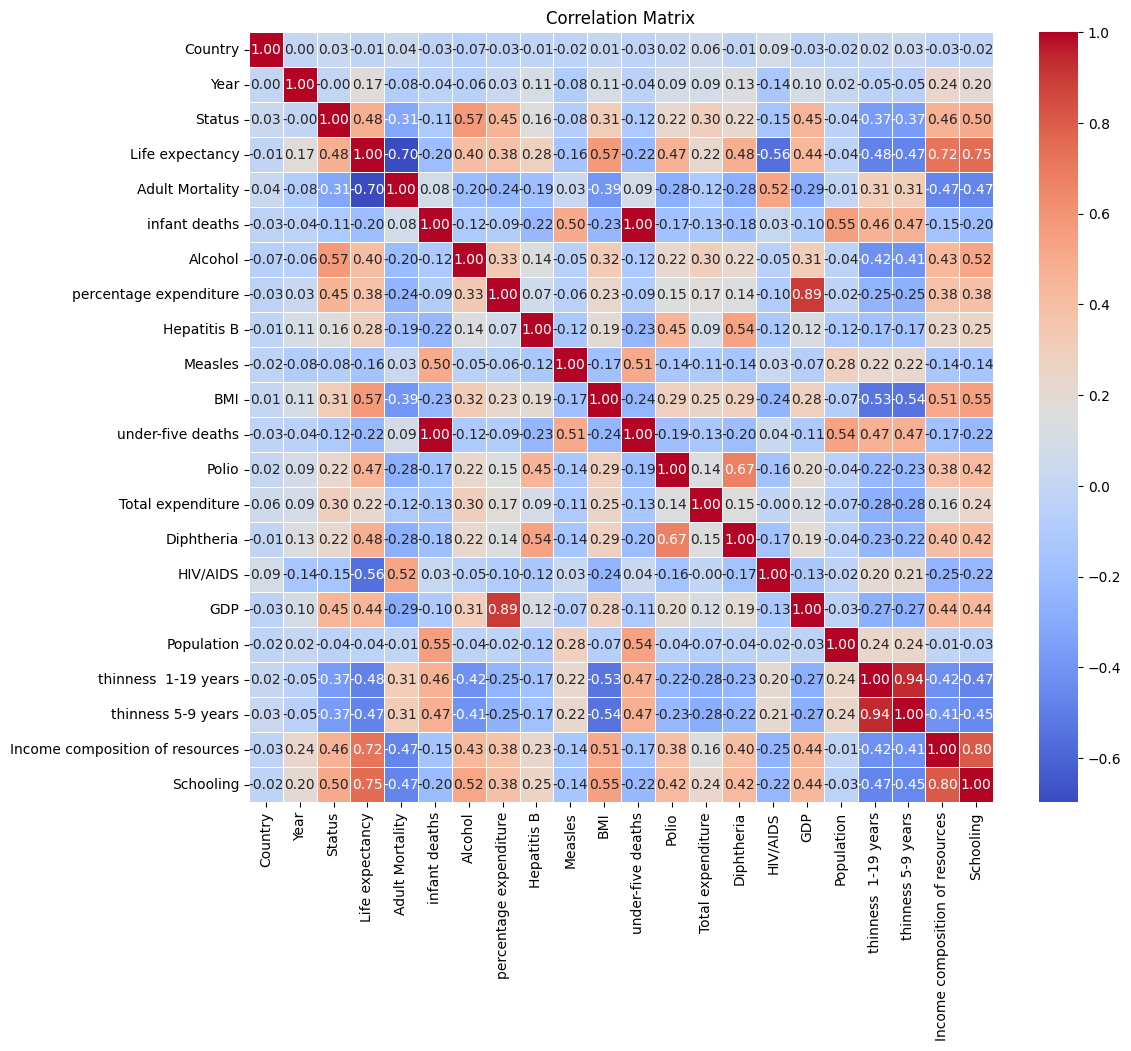

In [ ]:

correlation_matrix_after_missing_data = data_ulas_imputed.corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix_after_missing_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Matrix')
plt.show()

In [ ]:
life_expectancy_correlations = correlation_matrix_after_missing_data['Life expectancy']

# Sort correlations to see which ones are highly correlated with Life expectancy
sorted_correlations = life_expectancy_correlations.sort_values(ascending=False)
sorted_correlations

,Life expectancy
Life expectancy,1.000000
Schooling,0.745873
Income composition of resources,0.717528
BMI,0.570476
Status,0.480701
Diphtheria,0.480313
Polio,0.466595
GDP,0.437848
Alcohol,0.398379
percentage expenditure,0.380785


We have decied that these columns affects most the Life expectancy
*   Schooling
*   Income Composition of Resources
*   Diphtheria
*   Polio
*   BMI
*   GDP
*   Percentage
*   Expenditure on Health










In [ ]:
data_ulas_imputed.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
data_ulas_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   float64
 1   Year                             2938 non-null   float64
 2   Status                           2938 non-null   float64
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   float64
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   float64
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   float64
 12  Polio               

In [ ]:
features = ['Schooling', 'Income composition of resources', 'BMI', 'Diphtheria', 'Polio', 'GDP', 'percentage expenditure']
target = 'Life expectancy'

In [ ]:
assert all(col in data_ulas_imputed.columns for col in features + [target]), "Some columns are missing from the DataFrame"


In [ ]:
# Extract features and target
X = data_ulas_imputed[features]
y = data_ulas_imputed[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 26.649213358568023
R^2 Score: 0.6924968326543496


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R^2 Score: {r2_rf}")


Random Forest - Mean Squared Error: 10.137781270197637
Random Forest - R^2 Score: 0.8830209429262232


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)

# Initialize and train the model
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Transform test data
X_test_poly = poly.transform(X_test)
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression - Mean Squared Error: {mse_poly}")
print(f"Polynomial Regression - R^2 Score: {r2_poly}")


Polynomial Regression - Mean Squared Error: 15.74373823238588
Polynomial Regression - R^2 Score: 0.8183342484755576


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error')

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Grid Search Best Model - Mean Squared Error: {mse_best}")
print(f"Grid Search Best Model - R^2 Score: {r2_best}")


Best Parameters: {'max_depth': None, 'n_estimators': 200}
Grid Search Best Model - Mean Squared Error: 10.109355231134098
Grid Search Best Model - R^2 Score: 0.8833489487449886


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

print(f"Cross-Validation Mean Squared Error: {-cv_scores.mean()}")


Cross-Validation Mean Squared Error: 31.733094986929682


In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 3.717432993537434
Root Mean Squared Error: 5.162287609051632


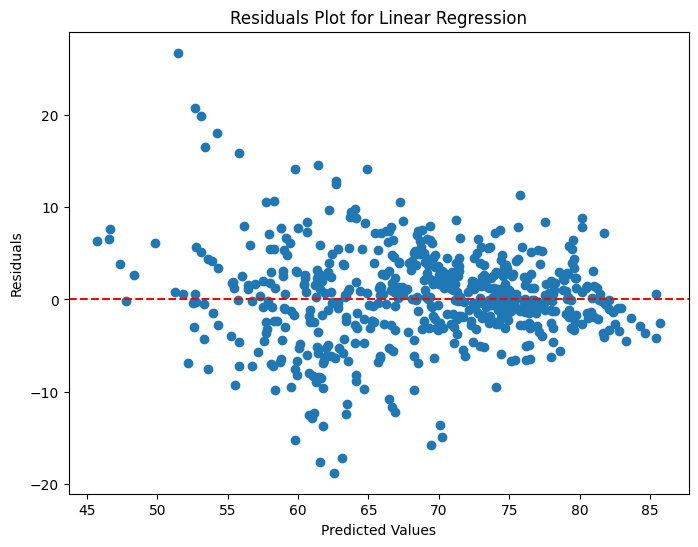

In [ ]:
# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot for Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


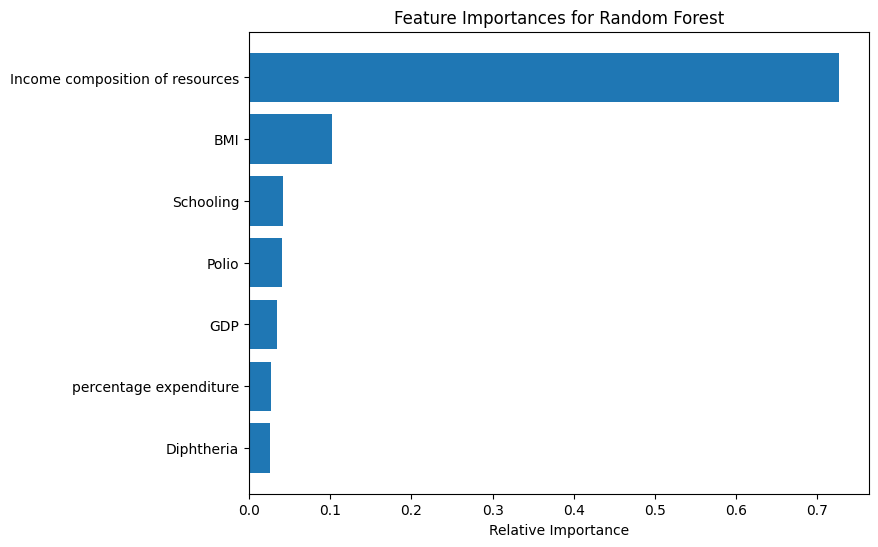

In [ ]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)

# Plot Feature Importance
plt.figure(figsize=(8, 6))
plt.title('Feature Importances for Random Forest')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


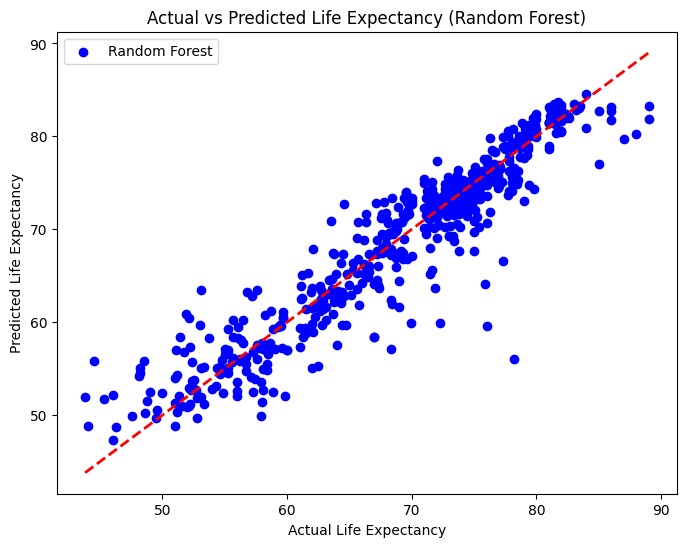

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Life Expectancy (Random Forest)')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.legend()
plt.show()


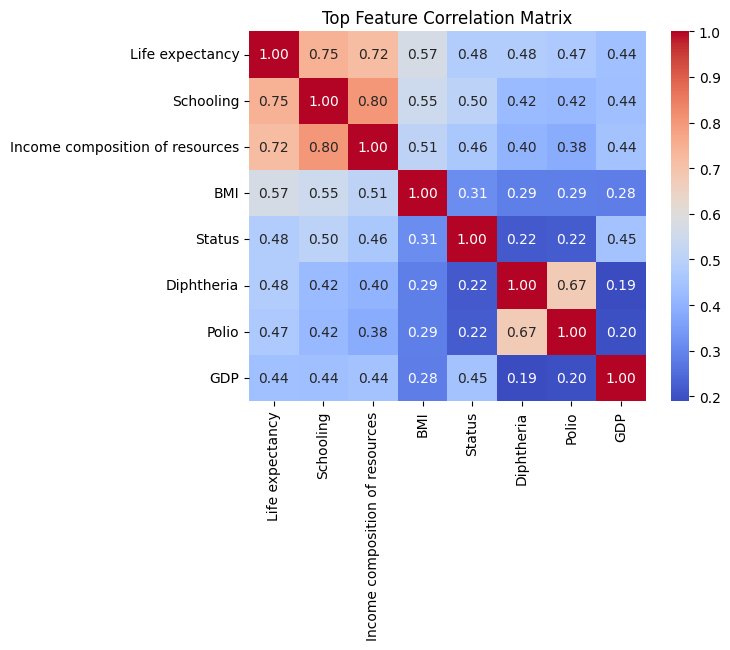

In [ ]:
top_features = sorted_correlations.index[:8]  # Choose top 8 correlated features
sns.heatmap(correlation_matrix_after_missing_data.loc[top_features, top_features], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top Feature Correlation Matrix')
plt.show()


In [ ]:
# Example of new data for prediction
new_data = pd.DataFrame({
    'Schooling': [12.0],
    'Income composition of resources': [0.6],
    'BMI': [25.0],
    'Diphtheria': [95.0],
    'Polio': [95.0],
    'GDP': [5000.0],
    'percentage expenditure': [150.0]
})

# Predict life expectancy using the Random Forest model
life_expectancy_prediction = rf_model.predict(new_data)
print(f"Predicted Life Expectancy: {life_expectancy_prediction[0]}")


Predicted Life Expectancy: 64.06200000000003
